In [12]:
!pip install kagglehub

# Data source

- 데이터
    - https://www.kaggle.com/datasets/sahilnbajaj/classified-data-for-knn/data

- 참고 노트
    - https://www.kaggle.com/code/sahilnbajaj/k-nearest-neighbors-with-python

In [13]:
# 캐글에서 데이터 다운로드
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sahilnbajaj/classified-data-for-knn")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/classified-data-for-knn


In [14]:
!ls {path}

'Classified Data'


In [15]:
file_path = path+"/Classified Data"

In [16]:
# 라이브러리
import pandas as pd
import numpy as np

In [17]:
df = pd.read_csv(file_path, index_col=0 )
df

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1
...,...,...,...,...,...,...,...,...,...,...,...
995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517,1
996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489,0
997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504,1
998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063,1


# 데이터 표준화
- 이유:
    - KNN은 가까운 관측치 n개를 기반으로 클래스를 예측함
    - 스케일(값의 범위, 크기)이 큰 변수가 거리에 많은 영향을 미침
    - KNN 분류기에 불균형한 영향을 줄 수 있으므로 표준화를 시킴

- 표준화와 정규화에 대한 자세한 사항은 [참고사항](#참고사항) 확인

- 구체적인 선택 이유 및 정리
    - KNN은 거리 기반 알고리즘이므로 변수들의 스케일을 맞춰주는 것이 중요함
    - Min-Max 정규화, 표준화 둘 다 사용되지만 일반적으로 표준화가 더 자주 권장

    - 📌이상치에 대한 민감도 때문
        - Min-Max 정규화는 데이터의 최솟값과 최댓값을 기준으로 스케일링하므로, 극단적인 이상치에 매우 민감. 이상치가 존재할 경우, 이 이상치가 새로운 스케일의 끝점을 결정하여 대부분의 다른 데이터 포인트들이 매우 좁은 범위 안에 압축되어 몰려 보이게 만들 수 있음.
        
        - **이는 알고리즘이 데이터 내의 미세한 차이를 식별하기 어렵게 만들 수 있음**

In [20]:
from sklearn.preprocessing import StandardScaler  # 스케일러 라이브러리
scaler = StandardScaler()                                  # 스케일러 정의
scaler.fit(df.drop('TARGET CLASS', axis=1))             # 스케일러 학습

StandardScaler()

In [25]:
scaled_feat = scaler.transform(df.drop('TARGET CLASS', axis=1))
df_feat = pd.DataFrame(scaled_feat, columns=df.columns[:-1])
df_feat

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510
...,...,...,...,...,...,...,...,...,...,...
995,0.211653,-0.312490,0.065163,-0.259834,0.017567,-1.395721,-0.849486,-2.604264,-0.139347,-0.069602
996,-1.292453,-0.616901,0.369613,0.482648,1.569891,1.273495,0.362784,-1.242110,-0.679746,1.473448
997,0.641777,-0.513083,-0.179205,1.022255,-0.539703,-0.229680,-2.261339,-2.362494,-0.814261,0.111597
998,0.467072,-0.982786,-1.465194,-0.071465,2.368666,0.001269,-0.422041,-0.036777,0.406025,-0.855670


In [69]:
df_feat.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,1.119105e-16,-2.939871e-16,-1.203482e-16,-1.882938e-16,-6.057377e-16,3.552714e-17,2.255973e-16,-4.760636e-16,3.197442e-16,4.503065e-16
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-2.678050e+00,-2.618747e+00,-2.275858e+00,-2.775551e+00,-2.947206e+00,-2.660802e+00,-2.620466e+00,-2.674465e+00,-2.701361e+00,-3.542140e+00
25%,-7.161683e-01,-6.702761e-01,-7.504105e-01,-7.279635e-01,-6.637361e-01,-7.127975e-01,-7.020467e-01,-7.120098e-01,-7.626629e-01,-6.863610e-01
50%,-3.180217e-02,1.628137e-02,-7.159299e-02,-2.293699e-02,1.433731e-02,-7.940354e-03,-7.093937e-02,-2.236584e-02,2.488297e-02,6.194010e-02
75%,7.378939e-01,7.534412e-01,6.664646e-01,6.631695e-01,6.820374e-01,7.012930e-01,6.723000e-01,7.311915e-01,7.661087e-01,6.961851e-01
max,2.667092e+00,2.799904e+00,3.049325e+00,4.151021e+00,2.538987e+00,2.825739e+00,2.940974e+00,2.470109e+00,2.477734e+00,2.602476e+00


# 데이터 분리 (train_test_split)
- X, y 분리
- train, test set 분리

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_feat, df['TARGET CLASS'],
                                                            random_state = 42,
                                                            test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 10), (200, 10), (800,), (200,))

# 모델 선택/학습/평가

In [40]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()

model_knn.fit(X_train, y_train)

pred = model_knn.predict(X_test)

print("학습 점수:", model_knn.score(X_train, y_train))
print("일반화 점수:", model_knn.score(X_test, y_test))

# 이때 score: 정확도(Accuracy)를 의미

학습 점수: 0.9525
일반화 점수: 0.95


In [64]:
from sklearn.metrics import classification_report, confusion_matrix

matrix = confusion_matrix(y_test, pred)
print("ℹ️ 혼동행렬\n", matrix)

matrix = pd.DataFrame(matrix,
                               index =[f'실제 {name})' for name in df['TARGET CLASS'].unique()],
                               columns =[f'예측 {name}' for name in df['TARGET CLASS'].unique()])

print("\n\nℹ️ df로 변환")
display(matrix)

print("\n\nℹ️ 분류 보고서")
print(classification_report(y_test, pred))

ℹ️ 혼동행렬
 [[94  4]
 [ 6 96]]


ℹ️ df로 변환


,예측 1,예측 0
실제 1),94,4
실제 0),6,96




ℹ️ 분류 보고서
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        98
           1       0.96      0.94      0.95       102

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200



## 하이퍼파라미터 튜닝


In [96]:
score_list_knn = []
error_list_knn = []

for i in range(1, 50):
    model_knn = KNeighborsClassifier(n_neighbors=i)
    model_knn.fit(X_train, y_train)
    pred = model_knn.predict(X_test)
    score_list_knn.append(model_knn.score(X_test, y_test))
    error_list_knn.append(np.mean(pred != y_test))

## 성능 시각화

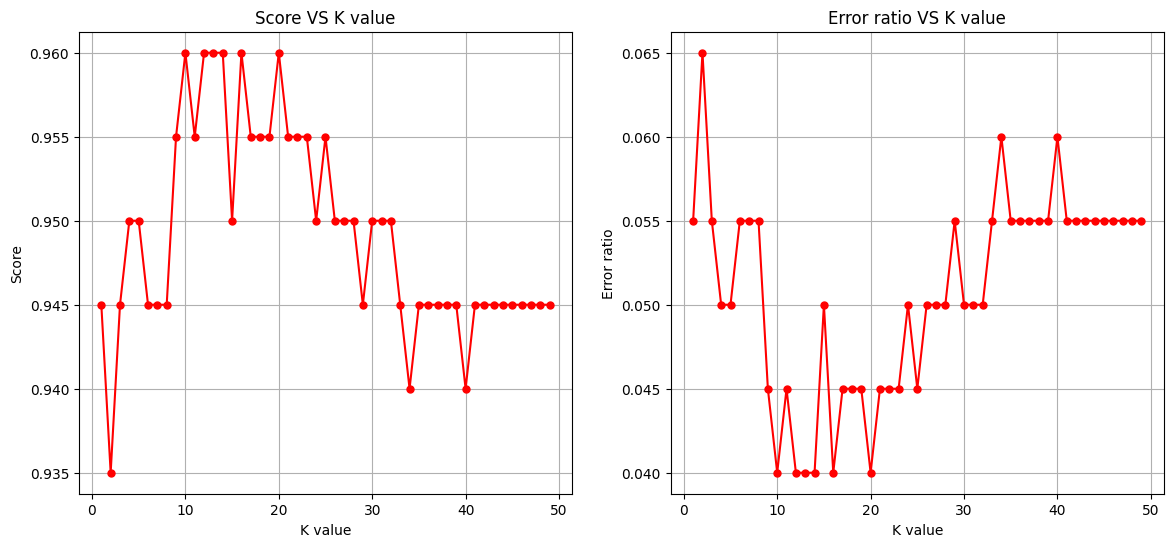

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

axes[0].plot(range(1, 50), score_list_knn, color='red', marker='o',  markersize =5)
axes[0].set_title("Score VS K value")
axes[0].set_xlabel("K value")
axes[0].set_ylabel("Score")
axes[0].grid(True)

axes[1].plot(range(1, 50),  error_list_knn, color="red", marker='o', markersize = 5)
axes[1].set_title("Error ratio VS K value")
axes[1].set_xlabel("K value")
axes[1].set_ylabel("Error ratio")
axes[1].grid(True)

plt.show()

In [124]:
series_score = pd.Series(score_list_knn, index=range(1, 50))
series_error = pd.Series(error_list_knn, index=range(1, 50))

# series_score.argmax() # 출력 9 / why? 데이터의 물리적 값을 반환하기 때문 (0 부터 시작)
high_index = series_score.idxmax() # 출력 10 / 설정된 index에 따라 반환

print(f'가장 좋은 성능 = k값: {high_index}')
print(f'정확도: {series_score[10]}, 오류비율: {series_error[10]}')

가장 좋은 성능 = k값: 10
정확도: 0.96, 오류비율: 0.04


## 교차검증

In [132]:
from sklearn.model_selection import cross_val_score

model_knn = KNeighborsClassifier(n_neighbors=10)
model_knn.fit(X_train, y_train)

score_train = cross_val_score(model_knn, X_train, y_train, cv=5)
score_test = cross_val_score(model_knn, X_test, y_test, cv=5)

print(f'train의 교차검증 성능: {score_train}')
print(f'test의 교차검증 성능: {score_test}')

print(f'train의 평균 교차검증 성능: {score_train.mean():.2f}')
print(f'test의 평균 교차검증 성능: {score_test.mean():.2f}')



train의 교차검증 성능: [0.93125 0.91875 0.90625 0.93125 0.93125]
test의 교차검증 성능: [0.95  0.9   0.925 0.975 0.9  ]
train의 평균 교차검증 성능: 0.92
test의 평균 교차검증 성능: 0.93


## 최종 성능

In [138]:
matrix = confusion_matrix(y_test, pred)
print("ℹ️ 혼동행렬\n", matrix)

matrix = pd.DataFrame(matrix,
                                index = [f'실제 {name}' for name in df['TARGET CLASS'].unique()],
                                columns = [f'예측 {name}' for name in df['TARGET CLASS'].unique()])

print("\n\nℹ️ df로 변환")
display(matrix)

print("\n\nℹ️ 분류 보고서")
print(classification_report(y_test, pred))

ℹ️ 혼동행렬
 [[93  5]
 [ 6 96]]


ℹ️ df로 변환


,예측 1,예측 0
실제 1,93,5
실제 0,6,96




ℹ️ 분류 보고서
              precision    recall  f1-score   support

           0       0.94      0.95      0.94        98
           1       0.95      0.94      0.95       102

    accuracy                           0.94       200
   macro avg       0.94      0.95      0.94       200
weighted avg       0.95      0.94      0.95       200



# 참고사항

## 1. 표준화 (Standardization / Z-score Normalization)
- 어떻게 작동?
    - 데이터의 각 특성(변수)에서 해당 특성(변수)의 평균을 빼고, 그 결과를 해당 특성의 표준편차로 나눔

---
$$ 공식: z = \frac{x - \mu}{\sigma} $$
---
---

- 언제 사용?
    - 데이터의 분포 형태에 관계없이 넓은 범위의 머신러닝 알고리즘에 보편적으로 유용
    - 이상치(Outlier)에 Min-Max 정규화보다 덜 민감하므로, 데이터에 이상치가 존재할 때 더 안정적인 성능을 기대
    - PCA(주성분 분석), 선형 회귀, 로지스틱 회귀, SVM, 신경망, 그리고 KNN과 같은 거리 기반 및 경사 하강법 기반 알고리즘에서 널리 사용
    - 변수들의 원래 분포 형태가 중요하다고 간주되거나, 이상치의 영향을 최소화하면서 스케일링하고 싶을 때

## 2. Min-Max 정규화 (Min-Max Normalization / Scaling to [0,1]) Normalization)
- 어떻게 작동?
    - 데이터의 각 특성(변수)을 0과 1사이의 특정 범위로 변환함

---
$$ 공식: x' = \frac{x - x_{\text{min}}}{x_{\text{max}} - x_{\text{min}}} $$
---
---

- 언제 사용?
    - 데이터의 모든 특성 값을 특정 범위(예: 0과 1 사이)로 엄격하게 제한해야 할 때 유용
    - 이미지 처리에서 픽셀 값을 0-255에서 0-1로 변환하는 경우, 또는 신경망의 활성화 함수(sigmoid, tanh 등) 입력이 특정 범위 내에 있어야 할 때 적합
    - 데이터에 이상치가 없다고 확신할 수 있는 경우에 효과적.
        - Min-Max 정규화는 선형 변환이므로 데이터의 근본적인 통계적 분포 형태(예: 왜도, 첨도 등) 자체를 비선형적으로 변화시키지는 않음. 즉, 데이터 포인트들 간의 상대적인 거리 비율과 순서는 유지됨.
        
        하지만, 극단적인 이상치가 존재할 경우, 이 이상치가 새로운 스케일의 최솟값(min)과 최댓값(max)을 결정하며 이로 인해 이상치가 아닌 대부분의 정상 데이터들이 0과 1 사이의 매우 좁은 범위(예: 0~0.1)에 극도로 압축되어 몰릴 수 있음.
        
        이렇게 데이터가 압축되면, 머신러닝 알고리즘이 해당 특성 내의 유의미한 미세한 차이를 식별하고 학습하는 데 효율성이 저하되거나 어려움을 겪을 수 있음. 이러한 현상을 일컬어 "스케일의 유효 범위가 왜곡될 수 있다"고 표현함

## 3. RobustScaler (로버스트 스케일러)
- 어떻게 작동?
    - 데이터의 각 특성(변수)에서 해당 특성의 중앙값(median)을 빼고, 그 결과를 사분위 범위(Interquartile Range, IQR)로 나눔
    - IQR은 75%에 해당하는 백분위수(Q3)에서 25%에 해당하는 백분위수(Q1)를 뺀 값 (IQR = Q3 - Q1)

---
$$ X_{\text{scaled}} = \frac{X - \text{median}}{Q3 - Q1} $$
---
---

- 언제 사용?
    - 데이터에 이상치(Outliers)가 존재하고, 이 이상치들이 스케일링 과정에 과도하게 영향을 미치는 것을 방지하고 싶을 때 가장 효과적
    - StandardScaler(평균과 표준편차 사용)나 Min-Max 정규화(최솟값과 최댓값 사용)는 이상치에 매우 민감하여 데이터 분포를 왜곡시킬 수 있지만, RobustScaler는 중앙값과 IQR을 사용하기 때문에 이상치에 강건하게(robust) 작동
    
    - RobustScaler는 데이터의 꼬리(이상치 영역)에 있는 값들의 영향을 최소화하고, 데이터의 중간 50% 범위(IQR)를 중심으로 스케일을 조정합니다. 이는 이상치가 존재하는 상황에서 데이터의 상대적 분포를 더 잘 보존하고, 모델이 정상 데이터를 효과적으로 학습할 수 있도록 도움

    - 즉, "스케일의 유효 범위가 이상치에 의해 왜곡되는 현상을 줄여줌"
